# Data Preprocessing
## Import data and get an overview
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Data%20Preprocessing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


This exercise explores the Melbourne housing market using this [Dataset]("https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data), containing residential property sales data across Melbourne

In [1]:
import pandas as pd

import numpy as np
data_root = "https://raw.githubusercontent.com/LuWidme/uk259/main/"

df=pd.read_csv(data_root +"/datasets/melb_data.csv")
# add additional column for demonstration purpose
df["Yard"]= np.random.choice(["none", "small", "medium", "large"], df.shape[0])
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Yard
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,none
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,large
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,small
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,large
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,none
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,large
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,none
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,large


# Repetition boolean indexing & Filtering

In [2]:
df["Rooms"]>2
#df[(df["Rooms"]>5)]
#df[(df["Rooms"]>2) & (df["SellerG"]!="Biggin")][["Postcode", "Price"]].iloc[:10,:]


,Rooms
0,False
1,False
2,True
3,True
4,True
...,...
13575,True
13576,True
13577,True
13578,True


# Initial Data Exploration

9000000.0

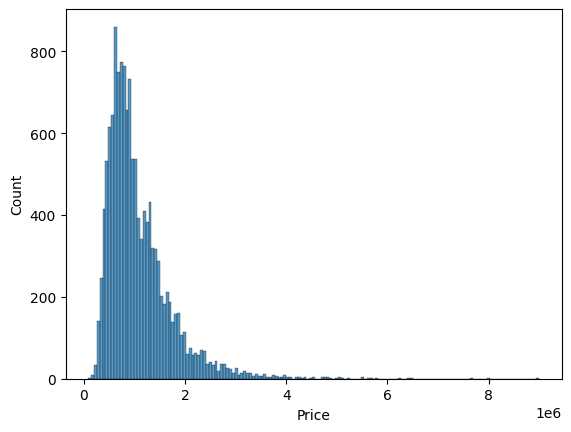

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"])
max(df["Price"])

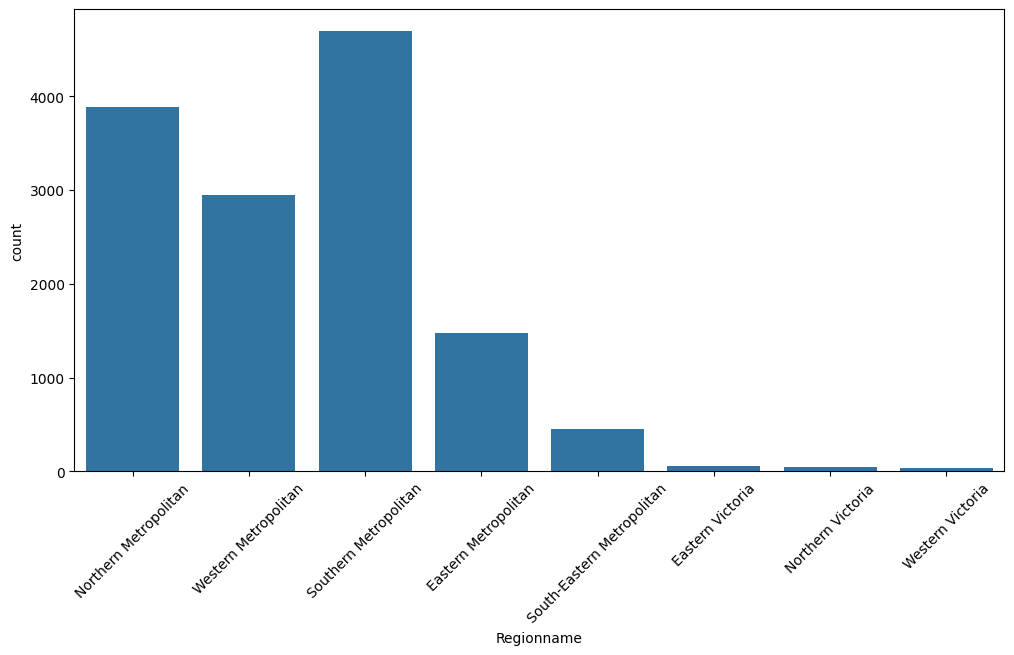

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Regionname', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

In [4]:
print("shape:\n", df.shape)
print("\ndatatypes:\n",df.dtypes)
print("\nstatistics: \n",df.describe())
print("\nnull values: \n",df.isnull().sum())

shape:
 (13580, 22)

datatypes:
 Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Yard              object
dtype: object

statistics: 
               Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000

## Remove missing values

dropna() takes various parameters like —
* axis — We can specify axis=0 if we want to remove the rows and axis=1 if we want to remove the columns.
* how — If we specify how = ‘all’ then the rows and columns will only be dropped if all the values are NaN.By default how is set to ‘any’.
* thresh — It determines the threshold value so if we specify thresh=5 then the rows having less than 5 real values will be dropped.
* subset —If we have 4 columns A, B, C and D then if we specify subset=[‘C’] then only the rows that have their C value as NaN will be removed.
* inplace — By default, no changes will be made to your dataframe. So if you want these changes to reflect onto your dataframe then you need to use inplace = True.


**decide on a strategy to handle the missing parameters and implement it.**

In [ ]:
print ("number of entries wit at least 1 NA: ", sum(df.isnull().any(axis=1)))
df.dropna().shape

## Standardization
In Standardization, we transform our values such that the mean of the values is 0 and the standard deviation is 1.
The important thing to note here is that we need to standardize both training and testing data.\
Skleanr Standardsacale implemnts a simple Scaler for us.

`fit()` calculates the mean and standard deviation and the `transform()` function actually standardizes the dataset.\
We can do this process in a single line of code using the `fit_transform()` function.\



In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[['Rooms_standardized','Price_standardized']] = std.fit_transform(df[['Rooms','Price']])
df[['Rooms_standardized','Price_standardized']]


## Questions:
* Does it make sense to standardize Postcode, Longitude, Propertycount, Distance?
* How can you interpret the fact that a hosue has a standardized prize of `-1.0`?

## Handling categorical variables

We need to preprocess ordinal and nominal categorical variables differently to make them interpretable for many machine learning algorithms. Here are some techniques one can use to encode Categorical values, such as:

* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding

Typecasting categrical variables to "category" is generally recommended for performance. for easy label encoding it is even necessary:

In [ ]:
df["Suburb_encoded"]=df["Suburb"].astype("category").cat.codes
df[["Suburb","Suburb_encoded"]].astype("category")

A different startegy to deal with categorical data is called "One-Hot Encoding":

In [ ]:
# from sklearn.preprocessing import LabelBinarizer

df1 = pd.get_dummies(df,prefix=['Regionname'], columns = ['Regionname'], drop_first=True)
df1.sample(n=10)

## Exercise

Pick one Variable in the Dataset above (e.g Price) and try to draw some conclusion about the data (e.g. how are prices distributed across the dataset, what is the highest/lowest price, how different are prices across regions, etc.)
If you have time, try to visualize this finding in a graph.